In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_excel('FEV-data-Excel.xlsx')

# Display the first few rows of the dataset
df.head()


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [5]:
#Task 1 a
# Filter based on criteria
filtered_evs = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]

# Display the filtered EVs
filtered_evs


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,408,760,disc (front + rear),4WD,80.0,414,...,2940.0,445.0,5,5,19,180,500.0,5.1,110,21.85
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,NaN,NaN,5,5,18,225,425.0,5.6,150,NaN
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,310,disc (front) + drum (rear),2WD (rear),58.0,425,...,2270.0,540.0,5,5,18,160,385.0,7.3,100,15.40


In [6]:
# task 1 b
# Group by manufacturer
grouped_by_make = filtered_evs.groupby('Make')

# Display grouped data (for verification)
grouped_by_make.size()


Make
Audi             1
BMW              1
Hyundai          1
Kia              2
Mercedes-Benz    1
Tesla            3
Volkswagen       3
dtype: int64

In [7]:
#task 1 c
# Calculate average battery capacity
avg_battery_capacity = grouped_by_make['Battery capacity [kWh]'].mean()

# Display the results
avg_battery_capacity


Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64

In [10]:
#task 2
# Calculate IQR
Q1 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
Q3 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['mean - Energy consumption [kWh/100 km]'] < lower_bound) |
              (df['mean - Energy consumption [kWh/100 km]'] > upper_bound)]

# Display the outliers
outliers




,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]


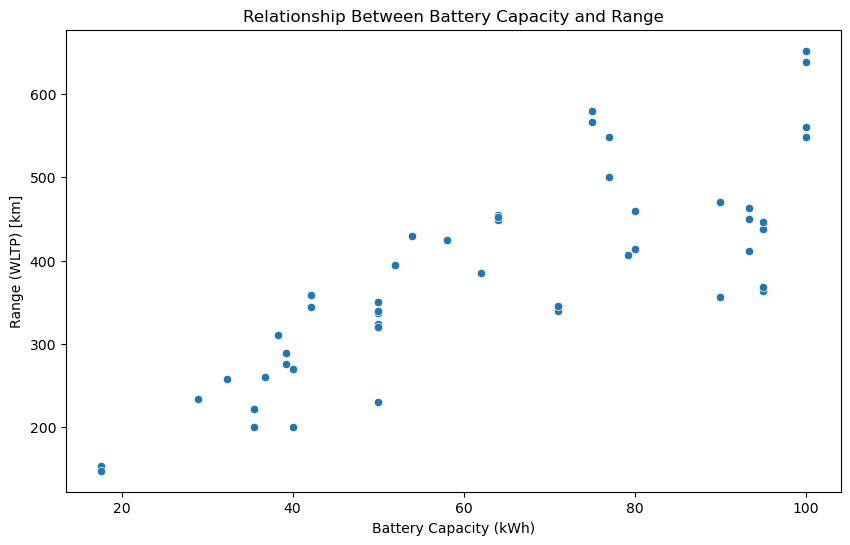

In [12]:
#task 3
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Battery capacity [kWh]', y='Range (WLTP) [km]')
plt.title('Relationship Between Battery Capacity and Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (WLTP) [km]')
plt.show()


In [13]:
#task 4
class EVRecommendation:
    def __init__(self, data):
        self.data = data
    
    def recommend(self, budget, min_range, min_battery_capacity):
        # Filter EVs based on user criteria
        recommendations = self.data[
            (self.data['Minimal price (gross) [PLN]'] <= budget) &
            (self.data['Range (WLTP) [km]'] >= min_range) &
            (self.data['Battery capacity [kWh]'] >= min_battery_capacity)
        ]
        
        # Sort by range and price for best options
        top_recommendations = recommendations.sort_values(
            by=['Range (WLTP) [km]', 'Minimal price (gross) [PLN]'],
            ascending=[False, True]
        ).head(3)
        
        return top_recommendations

# Create an instance of the class
ev_rec = EVRecommendation(df)

# Example usage
budget = 350000
min_range = 400
min_battery_capacity = 50
ev_rec.recommend(budget, min_range, min_battery_capacity)


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,204,310,disc (front) + drum (rear),2WD (rear),77.0,549,...,2280.0,412.0,5,5,19,160,385.0,7.9,125,15.9


In [14]:
# task 5
# Filter data for Tesla and Audi
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

# Display results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the average engine power between Tesla and Audi.")
else:
    print("There is no significant difference in the average engine power between Tesla and Audi.")


T-statistic: 1.7939951827297178, P-value: 0.10684105068839565
There is no significant difference in the average engine power between Tesla and Audi.
